In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_selection import SelectPercentile, f_classif
import pandas as pd
import math
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from nltk.stem import PorterStemmer

Load the data


In [336]:
Rdt = pd.read_csv(r'C:\Users\Rae-Djamaal\Anaconda3\Lib\site-packages\Pensionfunds_SQL_Practice\Reddit_Stk\News1.csv',index_col=0,parse_dates=True)
Rdt.head(3)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links


Stock Sentiment Breakdown

Text(0.5, 1.0, 'Stock Sentiment Breakdown')

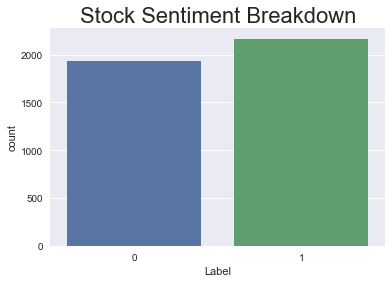

In [337]:
# Stock Sentiment Breakdown
sns.set(style="darkgrid")
ax = sns.countplot(x=Rdt['Label'].index, data = Rdt['Label'])
ax.set_title("Stock Sentiment Breakdown",fontsize= 22)
#print('decrease =',train['Label'].value_counts()[0],'\n',"increase =",train['Label'].value_counts()[1])

In [0]:
# Train,Test Split - We will do this before preprocessing for more realistic analysis
# Wont use train_test_split() in order to keep consecutive days
training_size = int(len(Rdt)*0.75)
train,test = Rdt[0:training_size],Rdt[training_size:len(Rdt)]
X_train, y_train = train.iloc[:,1:], train.iloc[:,0]
X_test, y_test = test.iloc[:,1:], test.iloc[:,0]

**Preprocessing - Feature Selection**

In [0]:
# Remove unwanted characters
train_data = X_train
train_data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [349]:
# Lowercase
hds = list(train_data.columns)
for i in hds:
  train_data[i]=train_data[i].str.lower()
train_data.tail(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
Date,,,,,,,,,,,,,,,,,,,,,
2012-06-04,eduard khil trololo guy dies in st peters...,copyright board of canada recently approved ne...,brazilian farmers sue monsanto five million f...,luka magnotta arrested in berlin german police,quebec bangs pots and pans in growing protests...,china arrests activists to prevent commemorati...,chevron still refusing to pay for ecuador spil...,us drone strike kills in pakistan,breivik judge caught playing cards during trial,luka magnotta the canadian body parts suspect...,...,tokyo gas attack suspect arrested after yea...,jerusalem apartment housing migrants firebombe...,thousands flee mexico s epicenter of marijuana...,no debt repayments higher salaries and freed...,killed in attack at mexico rehab center,years ago today the chinese people s liber...,solar powered plane attempts first intercontin...,many have wondered for years about the exact c...,as united states and western nations pull out ...,thousands continue protest in montreal after g...


In [353]:
#Tokenizing - Create of lists of  each corpus
headlines = []
for row in range(0,len(train_data.index)):
    headlines.append(list(' '.join(str(x) for x in train_data.iloc[row,]).split()))
headlines[0:2]

[['a',
  'hindrance',
  'to',
  'operations',
  'extracts',
  'from',
  'the',
  'leaked',
  'reports',
  'scorecard',
  'hughes',
  'instant',
  'hit',
  'buoys',
  'blues',
  'jack',
  'gets',
  'his',
  'skates',
  'on',
  'at',
  'ice',
  'cold',
  'alex',
  'chaos',
  'as',
  'maracana',
  'builds',
  'up',
  'for',
  'united',
  'depleted',
  'leicester',
  'prevail',
  'as',
  'elliott',
  'spoils',
  'everton',
  's',
  'party',
  'hungry',
  'spurs',
  'sense',
  'rich',
  'pickings',
  'gunners',
  'so',
  'wide',
  'of',
  'an',
  'easy',
  'target',
  'derby',
  'raise',
  'a',
  'glass',
  'to',
  'strupar',
  's',
  'debut',
  'double',
  'southgate',
  'strikes',
  'leeds',
  'pay',
  'the',
  'penalty',
  'hammers',
  'hand',
  'robson',
  'a',
  'youthful',
  'lesson',
  'saints',
  'party',
  'like',
  'it',
  's',
  'wear',
  'wolves',
  'have',
  'turned',
  'into',
  'lambs',
  'stump',
  'mike',
  'catches',
  'testy',
  'gough',
  's',
  'taunt',
  'langer',
  'e

In [0]:
# Remove Stopwords and Stemming

# Create stemming object
porter = PorterStemmer()
# Stopwords object
stop_words = set(stopwords.words('english')) 

cl_headline = []
for corp in headlines:
    temp = []
    for word in corp:
        if word not in stop_words:
            #Perform Stemming
          temp.append(porter.stem(word))
    cl_headline.append(temp)

In [357]:
# Flatten the list
flat_list = [' '.join(sublist) for sublist in cl_headline]
flat_list[0:3]

['hindranc oper extract leak report scorecard hugh instant hit buoy blue jack get skate ice cold alex chao maracana build unit deplet leicest prevail elliott spoil everton parti hungri spur sens rich pick gunner wide easi target derbi rais glass strupar debut doubl southgat strike leed pay penalti hammer hand robson youth lesson saint parti like wear wolv turn lamb stump mike catch testi gough taunt langer escap hit flintoff injuri pile woe england hunter threaten jospin new battl somm kohl successor drawn scandal differ men women sara denver nurs turn solicitor diana landmin crusad put tori panic yeltsin resign caught opposit flat foot russian roulett sold recov titl',
 'scorecard best lake scene leader german sleaz inquiri cheerio boyo main recommend cubi kill fee cubi kill fee cubi kill fee hopkin furiou foster lack hannib appetit cubi kill fee tale two tail say like like say elbow eye nippl task forc assess risk asteroid collis found last critic list time live dear doctor irish cou

**The following 3 Classification Models Will be using Bag of Words technique**

In [0]:
# Vectorize the text data-BOW
countvector1 = CountVectorizer(max_features = 5000,ngram_range=(2,2)) #unigrams and bigrams

# Convert a collection of text documents to a matrix of token counts
train_words = countvector1.fit_transform(flat_list)

# #More Feature selection - SelectPercentile select top 10%
# selector = SelectPercentile(score_func= f_classif , percentile= 10)
# #calculate the selector and transform
# train_words = selector.fit_transform(train_words,y_train)

Random Forrest

In [469]:
# Initilalize the RFC
randomclassifier = RandomForestClassifier(n_estimators=500)

## Fit the RFC on the Training Data
randomclassifier.fit(train_words,y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
## Vectorize the test Dataset
test_transform= []
for row in range(0,len(test)):
  test_transform.append(' '.join(str(x) for x in X_test.iloc[row,1:26]))
test_dataset = countvector1.transform(test_transform)

#More Feature selection - SelectPercentile Dim Reduction with F-test
#test_dataset = selector.transform(test_dataset)

#Predict the Response
y_predict = randomclassifier.predict(test_dataset)

accuracy = 0.5077972709551657
              precision    recall  f1-score   support

           0       0.40      0.12      0.18       476
           1       0.53      0.85      0.65       550

    accuracy                           0.51      1026
   macro avg       0.46      0.48      0.41      1026
weighted avg       0.47      0.51      0.43      1026



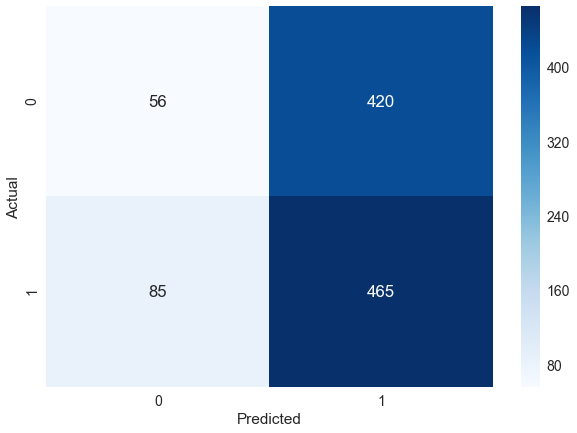

In [471]:
# Confusion Matrix
data = confusion_matrix(y_test,y_predict)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='g')

score=accuracy_score(y_test,y_predict)
print('accuracy =',score)

report=classification_report(y_test,y_predict)
print(report)

Text(0, 0.5, 'Testing Accuracy')

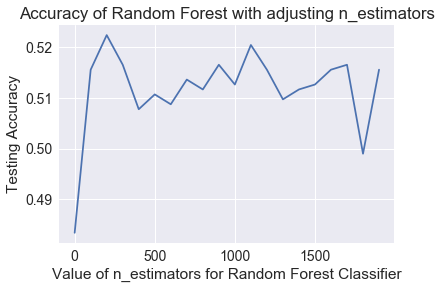

In [472]:
# RF Examine how Accuracy adjust with different n_estimators parameters
scores =[]
for k in range(1, 2001, 100):
    rfc = RandomForestClassifier(n_estimators=k)
    #rfc.fit(train_words,train['Label'])
    rfc.fit(train_words,y_train)
    y_predict = rfc.predict(test_dataset)
    #scores.append(accuracy_score(test['Label'], y_predict))
    scores.append(accuracy_score(y_test, y_predict))
# plot the relationship between K and testing accuracy
plt.title("Accuracy of Random Forest with adjusting n_estimators")
plt.plot(range(1, 2001, 100), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

Naiive Bayes 

In [0]:
#Initialize the MultinomialNB model
NBclassifier = MultinomialNB()
#Fit the model
NBclassifier.fit(train_words.toarray(),y_train)

# Predict the reponse
y_pred_NB = NBclassifier.predict(test_dataset.toarray())

# 10-Fold Cross validation
# print('Accuracy', np.mean(cross_val_score(NBclassifier,train_words.toarray(),train['Label'],cv = 10, scoring='roc_auc')))


Accuracy  0.5155945419103314
              precision    recall  f1-score   support

           0       0.48      0.45      0.46       476
           1       0.55      0.57      0.56       550

    accuracy                           0.52      1026
   macro avg       0.51      0.51      0.51      1026
weighted avg       0.51      0.52      0.51      1026



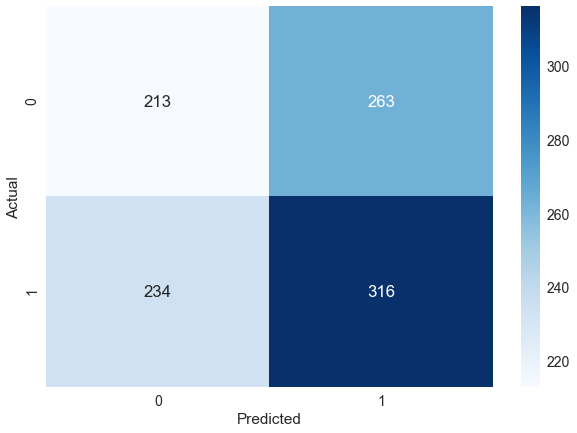

In [408]:
# Confusion Matrix
data = confusion_matrix(y_test,y_pred_NB)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='g')

score=accuracy_score(y_test,y_pred_NB)
print('Accuracy ', score)
report=classification_report(y_test,y_pred_NB)
print(report)


Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Train Model
classifier.fit(train_words, y_train)

# Predict the response
y_pred_DT = classifier.predict(test_dataset)

Accuracy  0.49317738791423
              precision    recall  f1-score   support

           0       0.46      0.54      0.50       476
           1       0.53      0.45      0.49       550

    accuracy                           0.49      1026
   macro avg       0.50      0.50      0.49      1026
weighted avg       0.50      0.49      0.49      1026



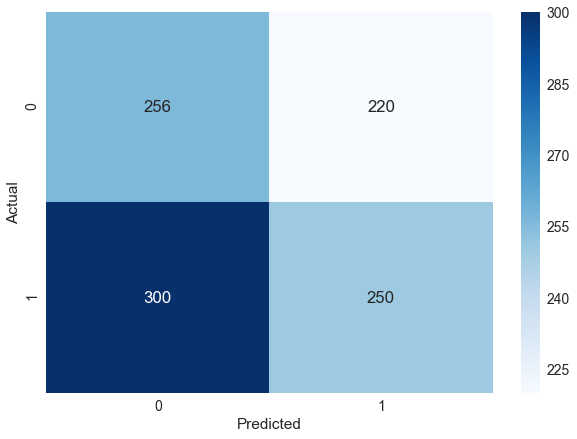

In [410]:
data = confusion_matrix(y_test,y_pred_DT)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='g')

score=accuracy_score(y_test,y_pred_DT)
print('Accuracy ', score)
report=classification_report(y_test,y_pred_DT)
print(report)

Conclusion- All models(BOWs) are basically at 50% accuracy, so me conclude the Reddit News Data is not a proper indicatior of stock price increases

**The following 3 Classification Models Will be using TF-IDF technique**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TFIDF Vectorizer
cv = TfidfVectorizer(max_features = 5000, ngram_range=(2,2))
# Vectorize the training data
X = cv.fit_transform(flat_list)

#Transforming the Train Data and SelectPercentile Dim Reduction
#selector = SelectPercentile(score_func= f_classif , percentile= 10)
# X_Red = selector.fit_transform(X,y_train)

Random Forest Cl

In [453]:
# Random Forest
randomclassifier = RandomForestClassifier(n_estimators=500,criterion='entropy')

randomclassifier.fit(X,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
## Vectorize the test set      # TF- IGF      -------> Make a Class
test_transform= []
for row in range(0,len(test)):
    test_transform.append(' '.join(str(x) for x in X_test.iloc[row,1:26]))
test_TFIGF = cv.transform(test_transform)

# #Transforming the Train Data and SelectPercentile Dim Reduction
# test_TFIGF = selector.transform(test_TFIGF)

#Predict the sentiment
y_pred = randomclassifier.predict(test_TFIGF)

accuracy = 0.5077972709551657
              precision    recall  f1-score   support

           0       0.44      0.24      0.31       476
           1       0.53      0.74      0.62       550

    accuracy                           0.51      1026
   macro avg       0.49      0.49      0.46      1026
weighted avg       0.49      0.51      0.48      1026



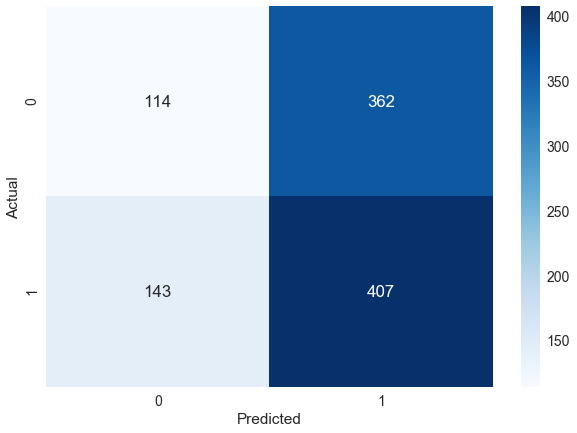

In [455]:
#RF Confusion Matrix
data = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='g')

score=accuracy_score(y_test,y_pred)
print('accuracy =',score)

report=classification_report(y_test, y_pred)
print(report)

Gaussian Naive Bayes

In [0]:
#Initialize the MultinomialNB model
NBclassifier = GaussianNB()
#Fit the model
NBclassifier.fit(X.toarray(),y_train)

# Predict the reponse
y_pred_NB = NBclassifier.predict(test_TFIGF.toarray())

# 10-Fold Cross validation
# print('Accuracy', np.mean(cross_val_score(NBclassifier,train_words.toarray(),train['Label'],cv = 10, scoring='roc_auc')))


accuracy = 0.5058479532163743
              precision    recall  f1-score   support

           0       0.47      0.53      0.50       476
           1       0.54      0.48      0.51       550

    accuracy                           0.51      1026
   macro avg       0.51      0.51      0.51      1026
weighted avg       0.51      0.51      0.51      1026



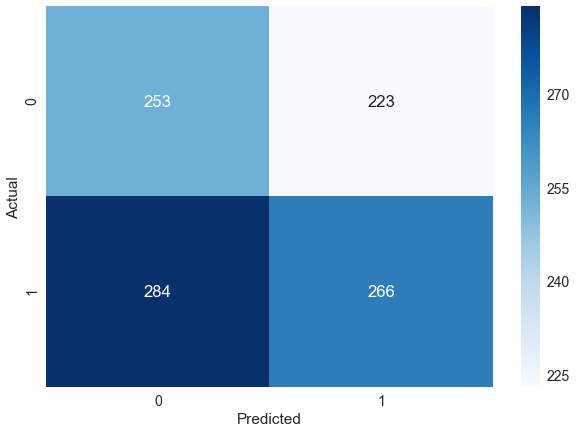

In [459]:
#NB Confusion Matrix
data = confusion_matrix(y_test,y_pred_NB)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='g')

score=accuracy_score(y_test,y_pred_NB)
print('accuracy =',score)

report=classification_report(y_test, y_pred_NB)
print(report)

Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Train Model
classifier.fit(X,y_train)

# Predict the response
y_pred_DT = classifier.predict(test_TFIGF)

accuracy = 0.5311890838206628
              precision    recall  f1-score   support

           0       0.49      0.37      0.42       476
           1       0.55      0.67      0.61       550

    accuracy                           0.53      1026
   macro avg       0.52      0.52      0.51      1026
weighted avg       0.52      0.53      0.52      1026



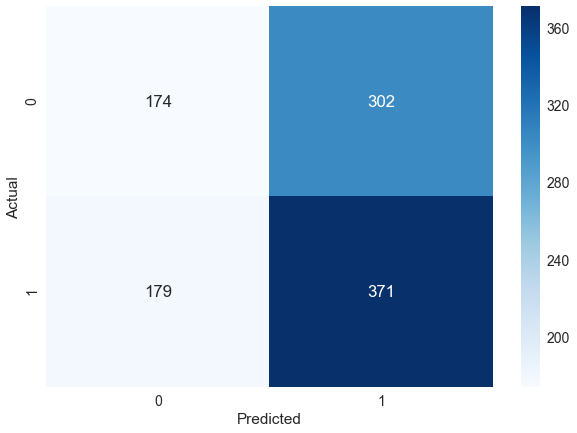

In [461]:
#DT Confusion Matrix
data = confusion_matrix(y_test,y_pred_DT)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,fmt='g')

score=accuracy_score(y_test,y_pred_DT)
print('accuracy =',score)

report=classification_report(y_test, y_pred_DT)
print(report)

Conclusion- All models(TF-IDF) are basically at 50% accuracy, so we conclude the Reddit News Data is not a proper indicatior of stock price increases

Examine - ROC CURVES for TF-IDK(Doesnt matter if BOW,both results are poor)

Random Forest: AUROC = 0.475
Naive Bayes: AUROC = 0.506
Naive Bayes: AUROC = 0.520


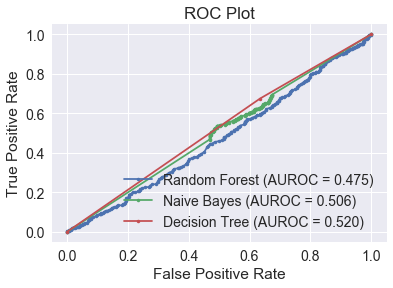

In [463]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# Prediction Probabilities
y_predict = randomclassifier.predict_proba(test_TFIGF) #RF
y_pred_NB = NBclassifier.predict_proba(test_TFIGF.toarray()) #NB
y_pred_DT = classifier.predict_proba(test_TFIGF)

# Keep The Prob of Stock Price Increase
rf_probs = y_predict[:, 1]
nb_probs = y_pred_NB[:, 1]
dt_probs = y_pred_DT[:, 1]

from sklearn.metrics import roc_curve, roc_auc_score

# Calc AUROC, is the area under the ROC curve
                        #test['Label']
rf_auc = roc_auc_score(y_test, rf_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Naive Bayes: AUROC = %.3f' % (dt_auc))


# False Positive and True Positive Rates
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

# Plot ROC Curve
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)



# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

Addiotional Parameter Optimization-Gridsearch to Find the best Parameters for Random Forest(TF_IDF)

In [464]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Initialize the classifier
rfc = RandomForestClassifier(random_state = 42)

# Parameters of Choice

param_grid = { 'max_depth':[3,5,10,None],
               'n_estimators': range(50,700,50),
                'max_features':['auto', 'sqrt', 'log2'],
               'criterion': ['gini', 'entropy'],
               'min_samples_leaf': range(1,4),
                'oob_score' : [True, False]
             }
  
# Initizalize the Ramdom Search CV
CV_rfc = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, scoring = 'accuracy')

# Fit the data
grid_search = CV_rfc.fit(X,y_train) 

C:\Users\Rae-Djamaal\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [466]:
accuracy = grid_search.best_score_
print('Highest Accuracy =', accuracy)
print('Best Parameters\n',grid_search.best_params_)

Highest Accuracy = 0.5258536585365854
Best Parameters
 {'oob_score': True, 'n_estimators': 100, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'entropy'}


52% Accuracy Confirms Our belief that Reddit News is not a good indicator of stock price increase